In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("C:/Users/Farooq/OneDrive/Desktop/onedrive/Desktop/weight_height_prediction.xlsx")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

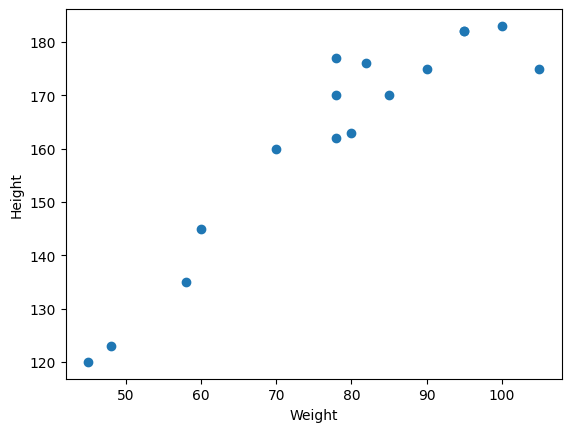

In [4]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


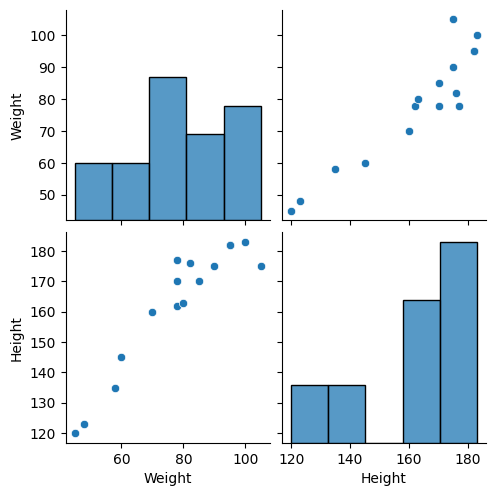

In [6]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
##independent and dependent features
X=df[['Weight']] ##independent features should be data frame pr 2 dimenstional
y=df['Height']## this variable can be in series or 1d array

In [8]:
X_series=df['Weight']
np.array(X_series).shape

(16,)

In [9]:
np.array(y).shape

(16,)

In [10]:
## Train Test split
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
#standardization
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

In [15]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression=LinearRegression(n_jobs=-1)

In [18]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [19]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [15.34724528]
Intercept: 167.58333333333334


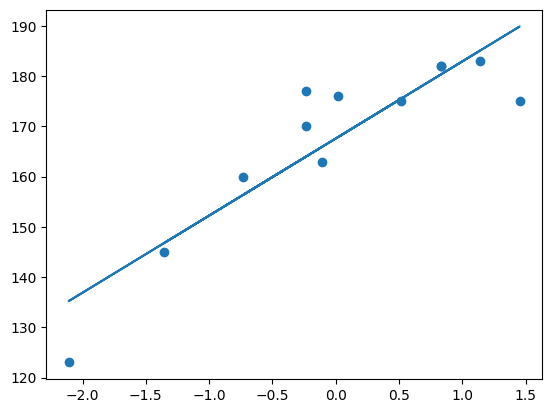

In [20]:
##plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [21]:
## prediction for test data
y_pred=regression.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


In [24]:
from sklearn.metrics import r2_score

In [25]:
score =r2_score(y_test,y_pred)
score

0.8444135525153134

In [26]:
## Display adjusted R-Squred
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.76662032877297

In [27]:
!pip install statsmodels


In [28]:
## OLS linear Regression
import statsmodels.api as sm

In [29]:
model=sm.OLS(y_train,X_train).fit()

In [30]:
prediction=model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [32]:
## prediction for new data 
regression.predict(scaler.transform([[72]]))

C:\Users\Farooq\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])